## Homework 2

#### John Stachurski

OSM 2018

### Exercise 1

Write your own version of a one dimensional [kernel density estimator](https://en.wikipedia.org/wiki/Kernel_density_estimation), which estimates a density from a sample.

Write it as a class that takes the data $X$ and bandwidth $h$ when initialized and provides a method $f$ such that

$$
    f(x) = \frac{1}{hn} \sum_{i=1}^n 
    K \left( \frac{x-X_i}{h} \right)
$$

For $K$ use the Gaussian kernel ($K$ is the standard normal density).

Write the class so that the bandwidth defaults to Silverman's rule (see the "rule of thumb" discussion on [this page](https://en.wikipedia.org/wiki/Kernel_density_estimation)).  Test the class you have written by going through the steps

1. simulate data $X_1, \ldots, X_n$ from distribution $\phi$
2. plot the kernel density estimate over a suitable range
2. plot the density of $\phi$ on the same figure

for distributions $\phi$ of the following types


* [beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) with $\alpha = \beta = 2$
* [beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) with $\alpha = 2$ and $\beta = 5$
* [beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) with $\alpha = \beta = 0.5$

Use $n=100$.

Make a comment on your results.  (Do you think this is a good estimator of these distributions?)

In [11]:
import numpy as np

class KDE():
    
    def __init__(self, X, h=None):
        self.X = X
        if h is None:
            self.h = ((4 * np.std(self.X) ** 5) / (3 * len(X))) ** (1 / 5)
        else:
            self.h = h
        
    def f(self, x):
        estimate = np.empty_like(x, dtype='f')
        for i, xi in enumerate(x):
            estimate[i] = np.sum(stats.norm.pdf((xi - self.X)/ self.h))
        return estimate / (self.h * len(self.X))

In [12]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

In [13]:
α = np.array([2, 2, 0.5])
β = np.array([2, 5, 0.5])

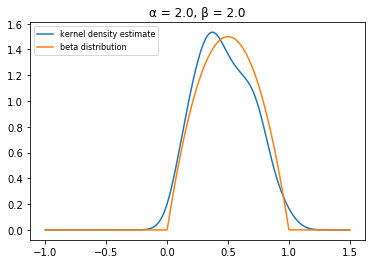

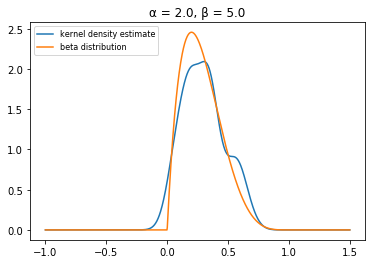

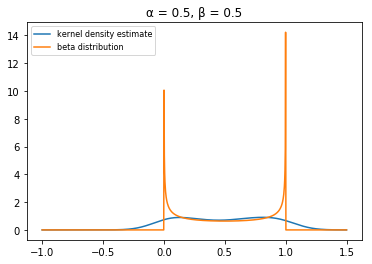

In [14]:
#fig, axes = plt.subplots(1, 3, figsize=(30, 5))

for i in range(3):
    X = stats.beta.rvs(α[i], β[i], size=100)
    kde = KDE(X)
    interval = np.linspace(-1, 1.5, 1000)
    
    plt.plot(interval, kde.f(interval), label="kernel density estimate")
    plt.plot(interval, stats.beta.pdf(interval, α[i], β[i]), label=f"beta distribution")
    plt.title(f'α = {α[i]}, β = {β[i]}')
    plt.legend(fontsize=8, loc='upper left')
    
    plt.show()

### Exercise 2

In class we discussed the following fact:  For the $AR(1)$ process

$$ X_{t+1} = \rho X_t + b + \sigma \xi_{t+1} $$

with $\{ \xi_t \}$ iid and standard normal, 

$$ 
    \psi_t = N(\mu, s^2) \implies \psi_{t+1} 
    = N(\rho \mu + b, \rho^2 s^2 + \sigma^2) 
$$

Confirm this, at least approximately, by simulation.  Let

* $\rho = 0.9$
* $b = 0.0$
* $\sigma = 0.1$
* $\mu = -3$
* $s = 0.2$

First, plot $\psi_t$ and $\psi_{t+1}$ using the true distributions described above.

Second, plot $\psi_{t+1}$ on the same figure (in a different color) as follows:

1. Generate $n$ draws of $X_t$ from the $N(\mu, s^2)$ distribution
2. Update them all using the rule $X_{t+1} = \rho X_t + b + \sigma \xi_{t+1}$
3. Use the resulting sample of $X_{t+1}$ values to produce a density estimate via kernel density estimation.

Try this for several different values of $n$ and confirm that the simulation based estimate of $\psi_{t+1}$ does converge to the theoretical distribution.

In [15]:
from scipy import stats 

ρ = 0.9
b = 0.0
σ = 0.1
μ = -3
s = 0.2

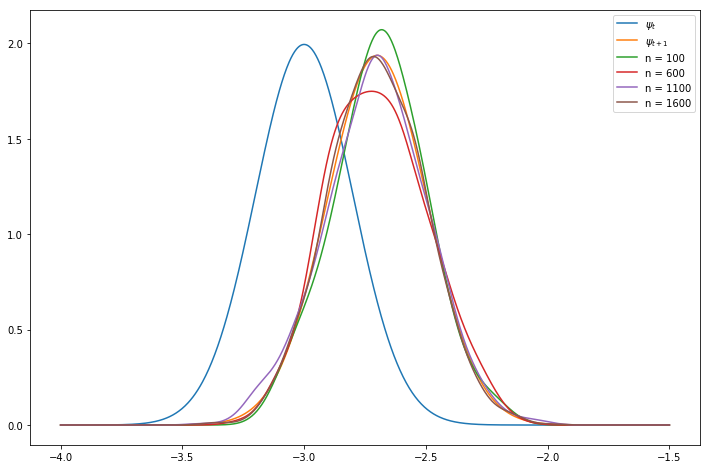

In [30]:
plt.figure(figsize=(12, 8))

interval = np.linspace(-4, -1.5, 1000)
ψt = stats.norm.pdf(interval, loc = μ, scale = s)
ψt1 = stats.norm.pdf(interval, loc = ρ * μ + b, scale = ((ρ * s) ** 2 + σ ** 2) ** (1 / 2))
plt.plot(interval, ψt, label='$\psi_t$')
plt.plot(interval, ψt1, label='$\psi_{t+1}$')

N = np.arange(100, 2000, 500)
for n in N:
    Xt = stats.norm.rvs(loc=μ, scale=s, size=n)
    Xt1 = ρ * Xt + b + σ * stats.norm.rvs(size=n)
    kde = KDE(Xt1)
    plt.plot(interval, kde.f(interval), label=f'n = {n}')

plt.legend()
plt.show()

### Exercise 3

In the lecture it was claimed that, for $n \times n$ matrix $A$, we have

$$ r(A) < 1 \implies A^k \to 0 $$

where convergence is in terms of the spectral norm.  

Prove this using Gelfand's formula.

Gelfand's formula states that 
$$ \|A^k\|^{\frac{1}{k}} \rightarrow r(A) \text{ as } k \rightarrow \infty$$

This implies that $\forall \epsilon > 0$ with $0 < r(A) + \epsilon < 1$, $\exists K$ s.t. $\forall k \geq K$ we have that 
$$ \|A^k\|^{\frac{1}{k}} - r(A) < \epsilon $$
$$ \implies \|A^k\| < (r(A) + \epsilon) ^ k$$

Since $(r(A) + \epsilon) < 1$, $(r(A) + \epsilon)^k \rightarrow 0$ as $k \rightarrow \infty$
$\implies \|A^k\| \rightarrow 0$.